<a href="https://colab.research.google.com/github/Mjbloomf/MAT-421/blob/Main/Module_H_22_4%2C_22_5%2C_22_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Module H: 22.4, 22.5, 22.6**

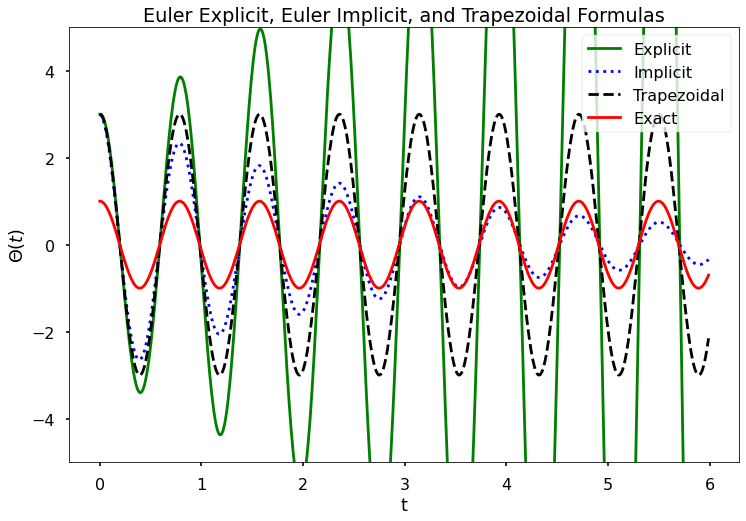

In [27]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline 


h1 = 0.01

t = np.arange(0, 6, h1)

w2 = 8

s0 = np.array([[3], [0]])

me = np.array([[1, h1], 
               [-w2**2*h1, 1]])
mi = inv(np.array([[1, -h1], 
               [w2**2*h1, 1]]))
mt = np.dot(inv(np.array([[1, -h1/2], 
    [w2**2*h1/2,1]])), np.array(
      [[1,h1/2], [-w2**2*h1/2, 1]]))

se = np.zeros((len(t), 2))

si = np.zeros((len(t), 2))

st = np.zeros((len(t), 2))


se[0, :] = s0.T
si[0, :] = s0.T
st[0, :] = s0.T

for j in range(0, len(t)-1):
    se[j+1, :] = np.dot(me,se[j, :])
    si[j+1, :] = np.dot(mi,si[j, :])
    st[j+1, :] = np.dot(mt,st[j, :])
    
plt.figure(figsize = (12, 8))
plt.title("Euler Explicit, Euler Implicit, and Trapezoidal Formulas")
plt.plot(t,se[:,0],'g-')
plt.plot(t,si[:,0],'b:')
plt.plot(t,st[:,0],'k--')
plt.plot(t, np.cos(w2*t), 'r')
plt.ylim([-5, 5])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()


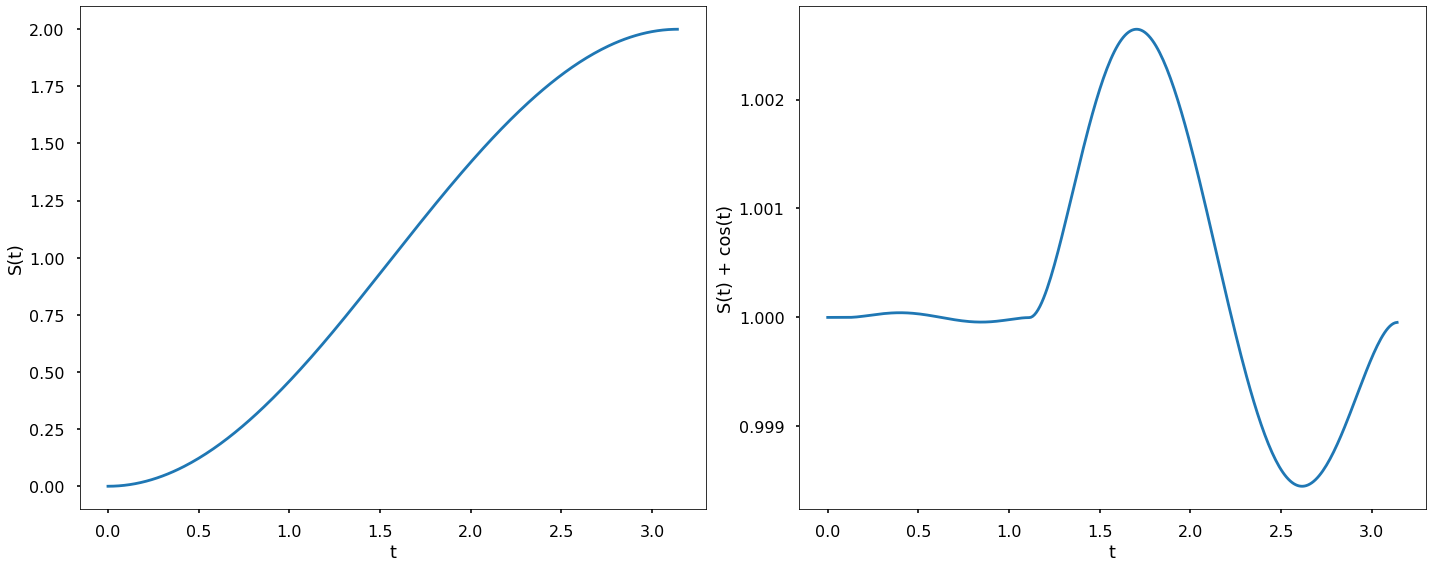

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

Fx = lambda t, st: np.sin(t)

t_eval = np.arange(0, np.pi, 0.01)
sol = solve_ivp(Fx, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] + np.cos(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) + cos(t)')
plt.tight_layout()
plt.show()